In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets,layers,models,optimizers
import numpy as np
from numpy import shape
import matplotlib.pyplot as plt

In [2]:
(image_train,label_train),(image_test,label_test) = datasets.cifar100.load_data(label_mode='coarse')

169001437/169001437 [==============================] - 3s 0us/step


In [3]:
shape(np.unique(label_train))

(20,)

In [4]:
print(shape(label_train))
print(shape(label_test))
print(shape(image_train))
print(shape(image_test))

(50000, 1)
(10000, 1)
(50000, 32, 32, 3)
(10000, 32, 32, 3)


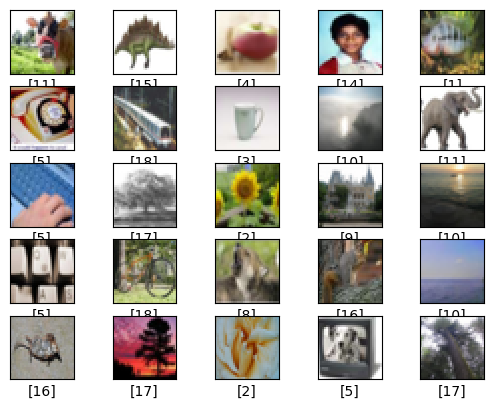

In [5]:
plt.figure()
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(image_train[i])
  plt.grid
  plt.xlabel(label_train[i])
plt.show()

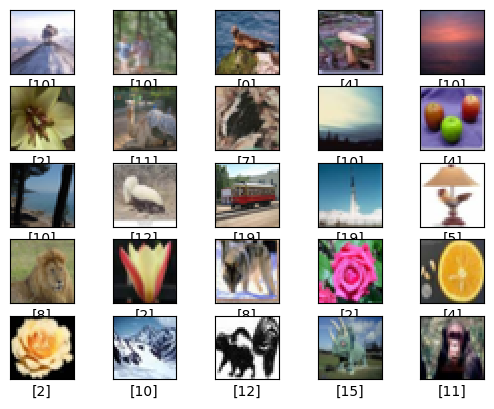

In [6]:
plt.figure()
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(image_test[i])
  plt.grid
  plt.xlabel(label_test[i])
plt.show()

In [7]:
image_train=image_train/255.0
image_test=image_test/255.0

In [8]:
model=models.Sequential(
    [
        layers.Conv2D(64,(3,3),activation='relu',input_shape=(32,32,3)),
        layers.Conv2D(64,(3,3),activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(32,(2,2),activation='relu'),
        layers.Conv2D(32,(2,2),activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Flatten(),
        layers.Dense(80,activation="relu"),
        layers.Dropout(0.3),
        layers.Dense(50,activation="relu"),
        layers.Dropout(0.2),
        layers.Dense(20),
    ]
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 32)        8224      
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 32)          0         
 g2D)                                                   

In [9]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [10]:
train=model.fit(image_train,label_train,epochs=50,batch_size=50,verbose=2)

Epoch 1/50
1000/1000 - 15s - loss: 2.6613 - accuracy: 0.1682 - 15s/epoch - 15ms/step
Epoch 2/50
1000/1000 - 6s - loss: 2.3589 - accuracy: 0.2675 - 6s/epoch - 6ms/step
Epoch 3/50
1000/1000 - 6s - loss: 2.2203 - accuracy: 0.3121 - 6s/epoch - 6ms/step
Epoch 4/50
1000/1000 - 5s - loss: 2.1219 - accuracy: 0.3453 - 5s/epoch - 5ms/step
Epoch 5/50
1000/1000 - 5s - loss: 2.0431 - accuracy: 0.3659 - 5s/epoch - 5ms/step
Epoch 6/50
1000/1000 - 5s - loss: 1.9715 - accuracy: 0.3896 - 5s/epoch - 5ms/step
Epoch 7/50
1000/1000 - 5s - loss: 1.9210 - accuracy: 0.4024 - 5s/epoch - 5ms/step
Epoch 8/50
1000/1000 - 5s - loss: 1.8738 - accuracy: 0.4187 - 5s/epoch - 5ms/step
Epoch 9/50
1000/1000 - 5s - loss: 1.8346 - accuracy: 0.4286 - 5s/epoch - 5ms/step
Epoch 10/50
1000/1000 - 5s - loss: 1.7905 - accuracy: 0.4399 - 5s/epoch - 5ms/step
Epoch 11/50
1000/1000 - 5s - loss: 1.7571 - accuracy: 0.4466 - 5s/epoch - 5ms/step
Epoch 12/50
1000/1000 - 5s - loss: 1.7265 - accuracy: 0.4576 - 5s/epoch - 5ms/step
Epoch 13/5

In [11]:
model.evaluate(image_test,label_test,batch_size=50)

200/200 [==============================] - 1s 3ms/step - loss: 1.8903 - accuracy: 0.4550


[1.8902724981307983, 0.45500001311302185]

Text(0, 0.5, 'ACCURACY')

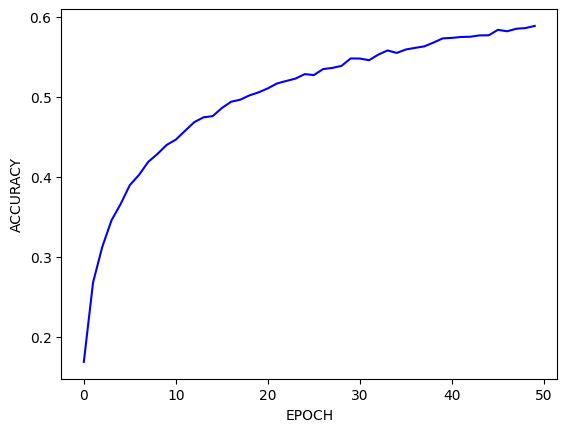

In [12]:
acc=train.history['accuracy']
epochs=range(len(acc))
plt.plot(epochs,acc,'b')
plt.xlabel('EPOCH')
plt.ylabel('ACCURACY')


In [13]:
model2= models.Sequential([
    layers.Conv2D(64,(7,7),strides=(2,2),padding='same',input_shape=(32,32,3)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((3,3),strides=(2,2)),
    layers.Conv2D(64,(3,3),padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Conv2D(128,(3,3),padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Conv2D(256,(3,3),padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Conv2D(512,(3,3),padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.GlobalAveragePooling2D(),
    layers.Dense(20),
]
)

In [14]:
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [15]:
model2.fit(image_train,label_train,epochs=10,batch_size=50,verbose=2)

Epoch 1/10
1000/1000 - 11s - loss: 2.1872 - accuracy: 0.3228 - 11s/epoch - 11ms/step
Epoch 2/10
1000/1000 - 7s - loss: 1.7911 - accuracy: 0.4360 - 7s/epoch - 7ms/step
Epoch 3/10
1000/1000 - 7s - loss: 1.5886 - accuracy: 0.4965 - 7s/epoch - 7ms/step
Epoch 4/10
1000/1000 - 7s - loss: 1.4434 - accuracy: 0.5412 - 7s/epoch - 7ms/step
Epoch 5/10
1000/1000 - 7s - loss: 1.3140 - accuracy: 0.5797 - 7s/epoch - 7ms/step
Epoch 6/10
1000/1000 - 7s - loss: 1.2018 - accuracy: 0.6160 - 7s/epoch - 7ms/step
Epoch 7/10
1000/1000 - 7s - loss: 1.1072 - accuracy: 0.6442 - 7s/epoch - 7ms/step
Epoch 8/10
1000/1000 - 7s - loss: 1.0086 - accuracy: 0.6742 - 7s/epoch - 7ms/step
Epoch 9/10
1000/1000 - 7s - loss: 0.9218 - accuracy: 0.7022 - 7s/epoch - 7ms/step
Epoch 10/10
1000/1000 - 7s - loss: 0.8312 - accuracy: 0.7295 - 7s/epoch - 7ms/step


In [16]:
model2.evaluate(image_test,label_test,batch_size=50)

200/200 [==============================] - 1s 4ms/step - loss: 1.4004 - accuracy: 0.5799


[1.4004102945327759, 0.5799000263214111]